In [1]:
import scipy as sp
sp.__version__

'1.9.1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('default')


In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

   Basic Minimization

In [13]:
from scipy.optimize import minimize
def f(x):
 return (x-3)**2
res = minimize(f, -5) # Function and initial guess
res

      fun: 2.8998967317448154e-15
 hess_inv: array([[0.5]])
      jac: array([-9.28002173e-08])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.99999995])

In [18]:
def f(x):
 return (x[0]-3)**2 + (x[1]+2)**2
res = minimize(f, [3, 0]) # Function and initial guess
res

      fun: 1.227307431912234e-15
 hess_inv: array([[1.00000000e+00, 7.37681254e-09],
       [7.37681254e-09, 5.00000005e-01]])
      jac: array([-4.41133388e-08, -2.28681190e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.99999997, -2.00000002])

 Basic Regression plot

Text(3.25, 1.7, 'y = 0.3 x + -0.1; r = 0.79')

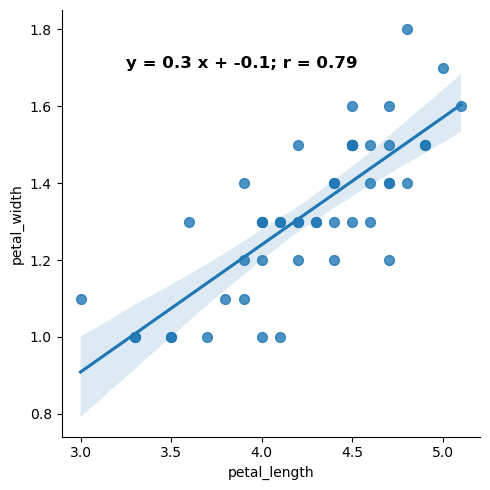

In [22]:
from scipy import stats
iris = sns.load_dataset('iris')
iris_vc = iris[iris['species']=='versicolor']
sns.lmplot(x='petal_length', y='petal_width', data=iris_vc, markers=['o'], scatter_kws={'s': 50})
# get coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(iris_vc['petal_length'], iris_vc['petal_width'])
plt.text(3.25, 1.7, "y = {0:.1f} x + {1:.1f}; r = {2:.2f}".format(slope,intercept, r_value), horizontalalignment='left', size='large', color='black', weight='semibold')


 Let's review some basic statistics

In [25]:
df_rw = pd.read_csv("winequality-red.csv", delimiter=";")
df_ww = pd.read_csv("winequality-white.csv", delimiter=";")
df_rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
df_rw[df_rw['quality']==5].info()
df_rw['pH'].max()
df_rw.max(axis=0) # Same for min(), mean(), median() and std()
df_rw.groupby(['quality'])[['citric acid']].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         681 non-null    float64
 1   volatile acidity      681 non-null    float64
 2   citric acid           681 non-null    float64
 3   residual sugar        681 non-null    float64
 4   chlorides             681 non-null    float64
 5   free sulfur dioxide   681 non-null    float64
 6   total sulfur dioxide  681 non-null    float64
 7   density               681 non-null    float64
 8   pH                    681 non-null    float64
 9   sulphates             681 non-null    float64
 10  alcohol               681 non-null    float64
 11  quality               681 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 69.2 KB


citric acid                                                       
              count      mean       std   min     25%    50%     75%   max
quality                                                                   
3              10.0  0.171000  0.250664  0.00  0.0050  0.035  0.3275  0.66
4              53.0  0.174151  0.201030  0.00  0.0300  0.090  0.2700  1.00
5             681.0  0.243686  0.180003  0.00  0.0900  0.230  0.3600  0.79
6             638.0  0.273824  0.195108  0.00  0.0900  0.260  0.4300  0.78
7             199.0  0.375176  0.194432  0.00  0.3050  0.400  0.4900  0.76
8              18.0  0.391111  0.199526  0.03  0.3025  0.420  0.5300  0.72

 Get to know your data

<AxesSubplot:>

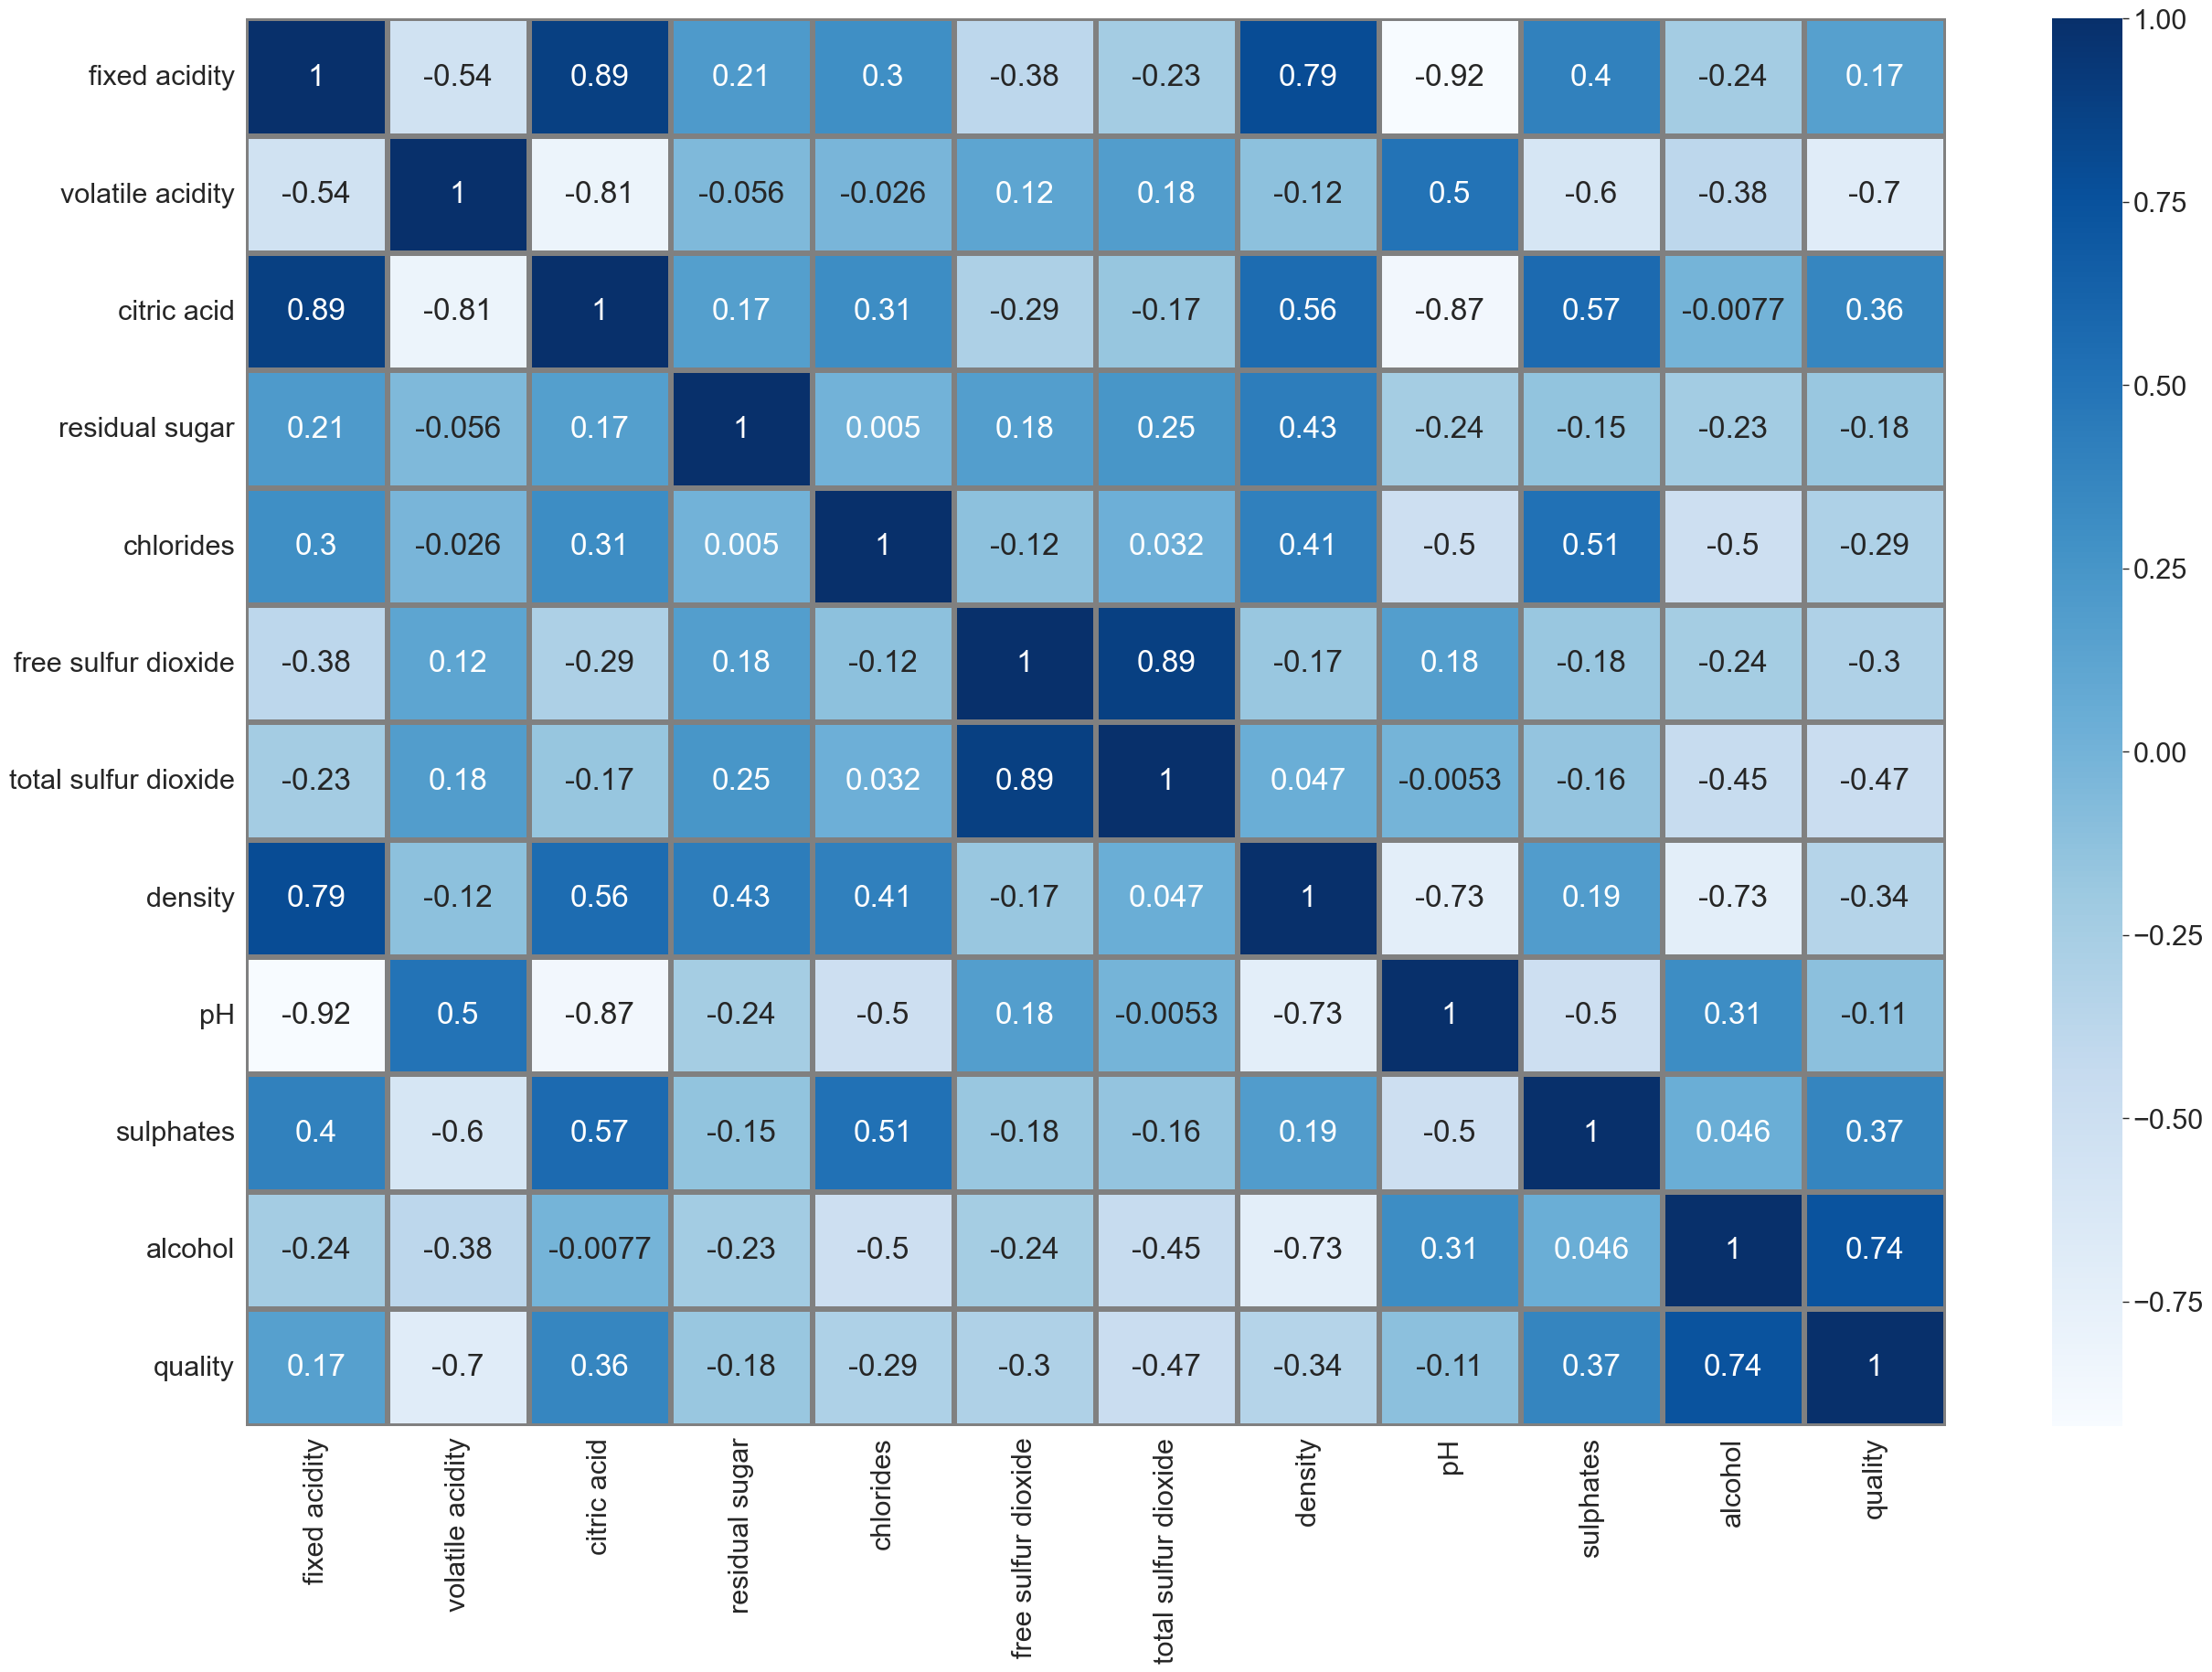

In [48]:
df_rw_mat = df_rw.corr(method='pearson') # kendall, spearman >>> plt.figure(figsize=(14,12))
plt.figure(figsize=(30,20))
sns.set_style('white')
sns.set_context('paper', font_scale=2.5);
sns.heatmap(df_rw_mat, annot=True, cmap='Blues', linecolor='grey', linewidth=3)

 Confidence Interval (CI) !!!! rewiev again

In [60]:
df_rw_quality5_alcohol = df_rw[df_rw['quality'] == 5]['alcohol']
#df_rw_quality5_alcohol 
print(df_rw_quality5_alcohol)
#mean = np.mean(df_rw_quality5_alcohol)
#mean

Series([], Name: alcohol, dtype: float64)


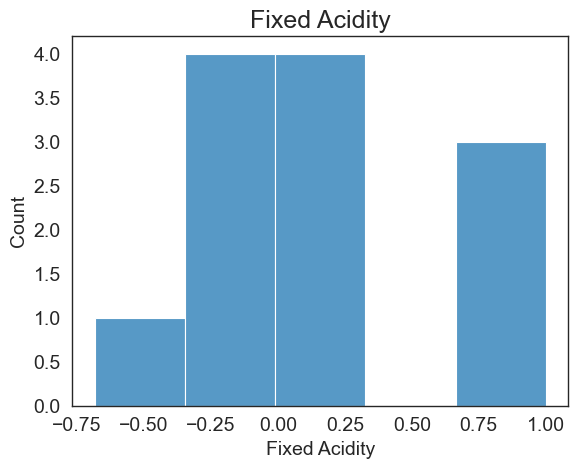

In [63]:
hist = sns.histplot(x='fixed acidity', data = df_rw)
hist.axes.set_title('Fixed Acidity', fontsize=18)
hist.set_xlabel('Fixed Acidity', fontsize=14)
hist.set_ylabel('Count', fontsize=14)
hist.tick_params(labelsize=14)


Text(0.5, 0, 'Fixed Acidity')

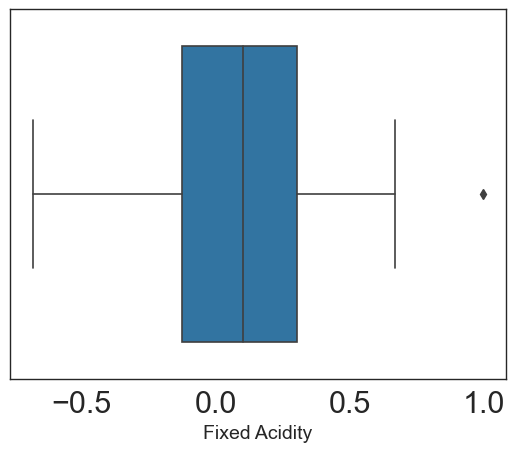

In [64]:
b = sns.boxplot(x='fixed acidity', data = df_rw)
b.set_xlabel('Fixed Acidity', fontsize = 14)

In [68]:
df_rw['color'] = 'red'
df_ww['color'] = 'white'
df_rw_ww = pd.concat([df_rw, df_ww])
df_rw_ww.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6.0,white


<AxesSubplot:xlabel='alcohol', ylabel='density'>

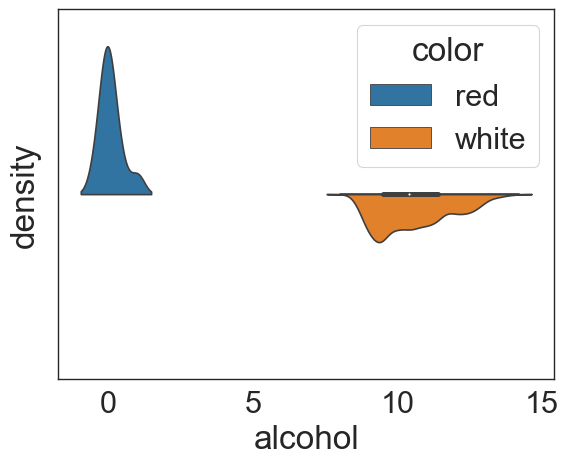

In [69]:
df_rw_ww['density'] = ''
sns.violinplot(x = 'alcohol', y = 'density', data = df_rw_ww, hue='color', split=True)

Statistics and Hypothesis

